# Task 4: Iris Flower Classifier with Logistic Regression & KNN

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Step 1: Load dataset

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## Step 2: Data Exploration

In [ ]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


In [ ]:
print("\nSpecies distribution:")
print(df['species'].value_counts())


Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Step 3: Visualization

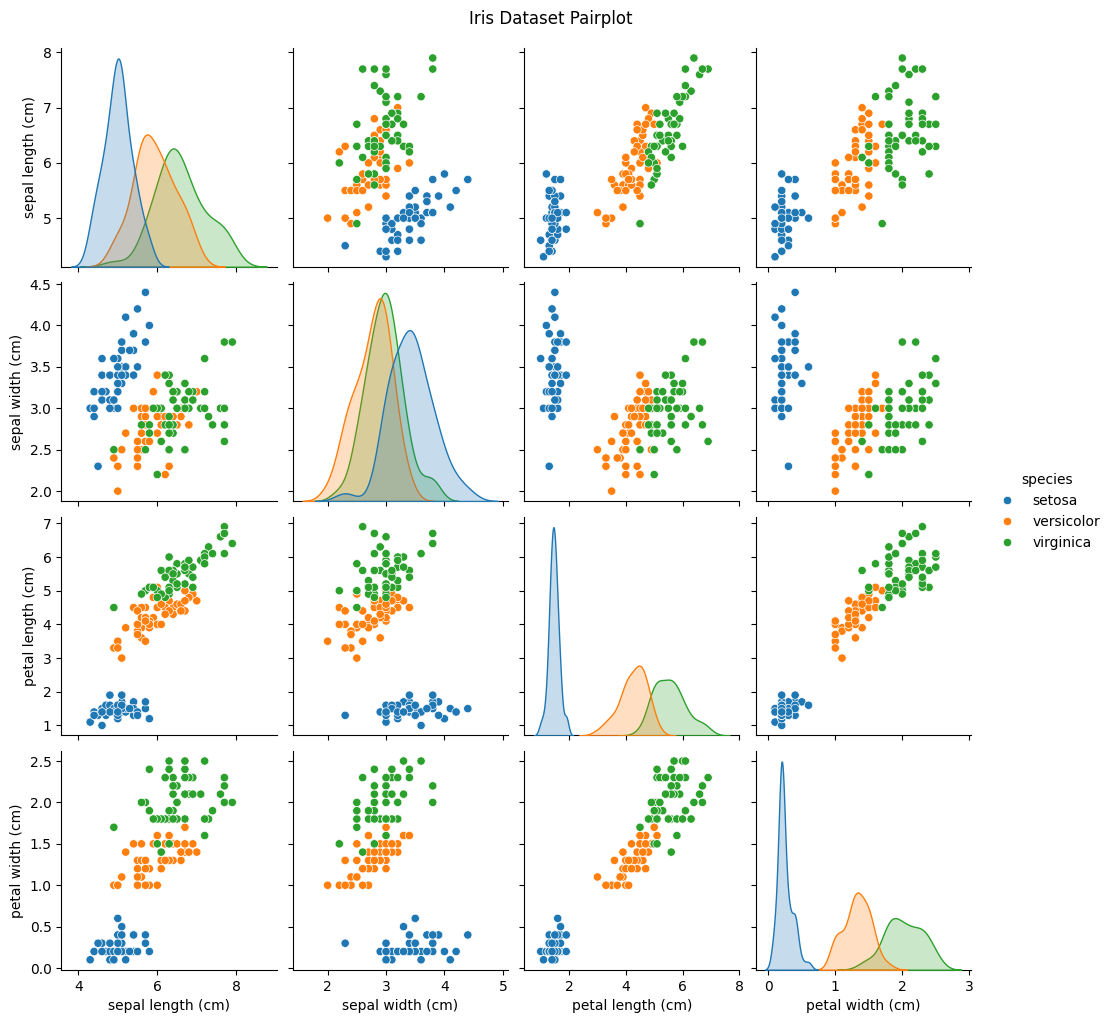

In [ ]:
sns.pairplot(df, hue="species")
plt.suptitle("Iris Dataset Pairplot", y=1.02)
plt.show()

## Step 4: Prepare features & labels

In [ ]:
X = df.iloc[:, :-1]  # Features
y = df['species']    # Target

## Step 5: Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-----------------------

## Logistic Regression

-----------------------

In [ ]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [ ]:
log_acc = accuracy_score(y_test, y_pred_log)
print("\n=== Logistic Regression ===")
print(f"Accuracy: {log_acc*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_log))


=== Logistic Regression ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



-----------------------

## KNN Classifier

-----------------------

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
knn_acc = accuracy_score(y_test, y_pred_knn)
print("\n=== KNN Classifier ===")
print(f"Accuracy: {knn_acc*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


=== KNN Classifier ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Step 6: Predict for new sample with both models

In [ ]:
new_sample = [[5.1, 3.5, 1.4, 0.2]]
pred_log = log_model.predict(new_sample)
pred_knn = knn_model.predict(new_sample)

In [ ]:
print(f"\nPrediction for {new_sample}:")
print(f"Logistic Regression → {pred_log[0]}")
print(f"KNN Classifier      → {pred_knn[0]}")


Prediction for [[5.1, 3.5, 1.4, 0.2]]:
Logistic Regression → setosa
KNN Classifier      → setosa


In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN Classifier"],
    "Accuracy": [log_acc*100, knn_acc*100]
})

In [ ]:
print("\n=== Model Comparison ===")
print(comparison_df)


=== Model Comparison ===
                 Model  Accuracy
0  Logistic Regression     100.0
1       KNN Classifier     100.0
